# Assignment 2
## Weather Temperature Plot
### Author: Ebelechukwu Chidimma Igwagu
Task 1: Commit something to your assignment repository this week (anything)

Task 2: I have put a CSV file in a assignment folder in the PFDA-courseware repository

Create a jupyter notebook called assignment2-weather.ipynb that has a nice plot of the temperature over time ("dryBulbTemperature_Celsius" ).

Marks will be given for:

- Completing the assignment
- How nice the plot looks
- You may use PANDAS if you wish to read in the data

In [37]:
# Import the necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()            #setting seaborn as default style for plots when using matplotlib

In [38]:
# Filepath
filepath = r"C:\Users\great\Desktop\ATU\Semester 2\PFDA-courseware\assignment\weatherreadings1.csv"

In [39]:
# Using pandas dataframe and converting selected columns to datetime
df = pd.read_csv(filepath, parse_dates=['reportStartDateTime', 'reportEndDateTime'])



In [40]:
# Display first 3 rows
df.head(3)


,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:15:00+00:00,2024-10-02 16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:45:00+00:00,2024-10-02 16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:00:00+00:00,2024-10-02 17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947


In [41]:
# Display last 3 rows
df.tail(3)

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
86,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 14:30:00+00:00,2024-10-03 14:30:00+00:00,1,True,True,1,WeatherLink,354,76.9,...,False,-8.8545,53.5244,45,20241003b396uzhb1oe69kyhyytrtenn4a,2024-10-03T14:30:00+00:00,1000013318,2024-10-03T14:30:45.6588747+00:00,1,12578862046
87,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 14:45:00+00:00,2024-10-03 14:45:00+00:00,1,True,True,1,WeatherLink,307,76.5,...,False,-8.8545,53.5244,45,20241003m16wydcb1ae69kyhyytrtenn4a,2024-10-03T14:45:00+00:00,1000013318,2024-10-03T14:47:10.3227765+00:00,1,12578876749
88,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 15:00:00+00:00,2024-10-03 15:00:00+00:00,1,True,True,1,WeatherLink,5,77.5,...,False,-8.8545,53.5244,45,20241003mxugxbcbuye69kyhyytrtenn4a,2024-10-03T15:00:00+00:00,1000013318,2024-10-03T15:01:27.9432439+00:00,1,12578888986


In [42]:
# Display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     datetime64[ns, UTC]
 2   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

In [43]:
df.shape

(89, 35)

In [44]:
# check for missing values
# df.isnull().sum()

### Data Visualization
The temperature over time will be plotted using the variables dry bulb temperature in celsius, report start datetime and report end datetime.

In [45]:
df[['dryBulbTemperature_Celsius', 'reportStartDateTime',  'reportEndDateTime']].tail(3)

,dryBulbTemperature_Celsius,reportStartDateTime,reportEndDateTime
86,14.944444,2024-10-03 14:30:00+00:00,2024-10-03 14:30:00+00:00
87,14.944444,2024-10-03 14:45:00+00:00,2024-10-03 14:45:00+00:00
88,14.722222,2024-10-03 15:00:00+00:00,2024-10-03 15:00:00+00:00


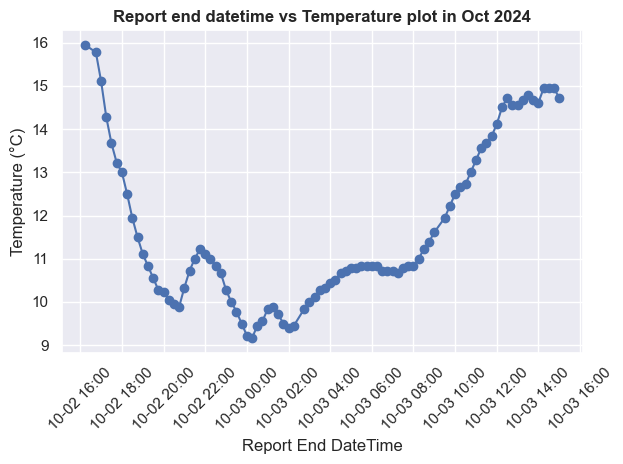

In [46]:
# Plot temperature vs report end datetime in OCtober 2024
plt.plot(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], marker='o')

# Adding labels and title
plt.title('Report end datetime vs Temperature plot in Oct 2024', fontweight = 'semibold')
plt.xlabel('Report End DateTime')
plt.ylabel('Temperature (°C)')

# Format x-axis to display both date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

# Set tick placement to every 2 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))

# Format the x-axis for easy readability
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


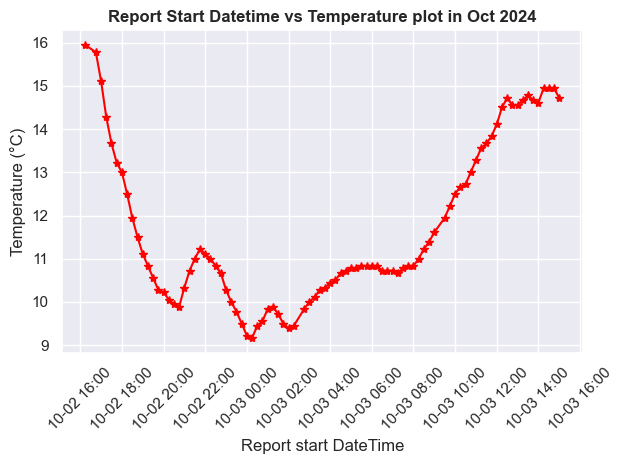

In [47]:
# Plot temperature vs report start datetime in OCtober 2024
plt.plot(df['reportStartDateTime'], df['dryBulbTemperature_Celsius'], marker='*', color='red')

# Adding labels and title
plt.title('Report Start Datetime vs Temperature plot in Oct 2024',  fontweight = 'semibold')
plt.xlabel('Report start DateTime')
plt.ylabel('Temperature (°C)')

# Format x-axis to display both date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

# Set tick placement to every 2 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))

# Format the x-axis for easy readability
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


### References

- Yim, A., Chung, C. and Yu, A. (2018) MatPlotlib for Python developers. https://openlibrary.org/books/OL26833606M/Matplotlib_for_Python_Developers_Effective_techniques_for_data_visualization_with_Python_2nd_Edition.


- Petrou, T. (2017) Pandas Cookbook: Recipes for Scientific Computing, Time Series Analysis and Data Visualization using Python. https://play.google.com/store/books/details?id=yRhKDwAAQBAJ&rdid=book-yRhKDwAAQBAJ&rdot=1&source=gbs_atb&pcampaignid=books_booksearch_atb&pli=1.


- https://lectures.scientific-python.org/intro/matplotlib/index.html

- https://matplotlib.org/stable/tutorials/pyplot.html

